In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from util import get_data, plot_data
import csv

def author():
    return 'adurocher3'

def get_portfolio_value(df_prices, df_trades, symbol):
    best_df = pd.concat([df_prices, df_trades], axis = 1)
    best_df['holding'] = best_df.trades.cumsum(axis = 0) * best_df[symbol]
    best_df['cash'] = - best_df[symbol] * best_df.trades + sv
    port_val = pd.DataFrame(best_df.holding + best_df.cash, columns=['best portfolio'])
    return port_val

def compute_portfolio_stats(prices, rfr = 0.0, sf = 252.0):
    
    port_val = prices
    # daily returns on portfolio value
    daily_rets = (port_val / port_val.shift(1)) - 1
    daily_rets = daily_rets[1:]

    cr = (port_val.iloc[-1] / port_val.iloc[0]) - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sr = np.sqrt(sf) * ((adr - rfr) / sddr)

    return cr, adr, sddr, sr

def get_benchmark(df_prices, sv = 100000):
    df_trades = pd.DataFrame(data = np.zeros((len(df_prices),2)), 
                             index = df_prices.index, columns=['benchmark', 'cash'])
    # BUY 1000 JPM and hold
    df_trades.iloc[0] = [1000, 100000 - 1000 * df_prices.iloc[0]]
    df_holdings = df_trades.cumsum(axis = 0)
    df_holdings.benchmark *= df_prices
    df_portval = df_holdings.sum(axis = 1)
    return df_portval

def testPolicy(symbol = 'JPM', sd=dt.datetime(2010,1,1), ed=dt.datetime(2011,12,31), sv = 100000):
    df_prices_all = get_data([symbol], pd.date_range(sd, ed))
    df_prices = df_prices_all[symbol]
    
    df_trades = pd.DataFrame(data = np.zeros(len(df_prices)), index = df_prices.index, columns=['trades'])
    
    for t in range(1, len(df_prices)-1):
        # buy signal 
        if df_prices[t-1] >= df_prices[t] < df_prices[t+1]:
            df_trades.iloc[t] = 1000
        # sell signal
        if df_prices[t-1] <= df_prices[t] > df_prices[t+1]:
            df_trades.iloc[t] = -1000
    
    return df_trades

In [3]:
best_df_trades_in = testPolicy('JPM', dt.datetime(2008,1,1), dt.datetime(2009, 12, 31))
best_df_trades_in.head(n=5)

,trades
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,1000.0
2008-01-07,-1000.0
2008-01-08,1000.0


In [4]:
#for report only
symbol = 'JPM'
sd=dt.datetime(2008,1,1)
ed=dt.datetime(2009,12,31)
sv = 100000
df_prices_all = get_data([symbol], pd.date_range(sd, ed))
df_prices = df_prices_all[symbol]
benchmark = pd.DataFrame(get_benchmark(df_prices))

port_val = get_portfolio_value(df_prices, best_df_trades_in, symbol)
port_val.head(n=5)

,best portfolio
2008-01-02,100000.0
2008-01-03,100000.0
2008-01-04,100000.0
2008-01-07,137710.0
2008-01-08,100000.0


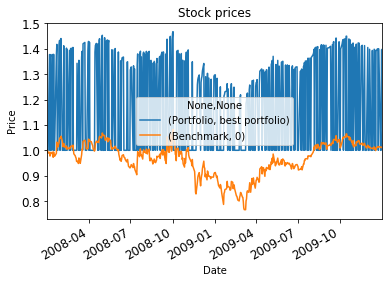

In [5]:
#cr, adr, sddr, sr = compute_portfolio_stats(port_val)
#print(cr, adr, sddr, sr)
df_temp = pd.concat([port_val, benchmark], keys=['Portfolio', 'Benchmark'], axis=1)
#normalize for plot
df_temp = df_temp / df_temp.iloc[0]
plot_data(df_temp)